In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [2]:
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [3]:
data.shape

(7043, 21)

In [4]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [5]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['Partner'] = le.fit_transform(data['Partner'])
data['Dependents'] = le.fit_transform(data['Dependents'])
data['PhoneService'] = le.fit_transform(data['PhoneService'])
data['MultipleLines'] = le.fit_transform(data['MultipleLines'])
data['InternetService'] = le.fit_transform(data['InternetService'])
data['OnlineSecurity'] = le.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = le.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = le.fit_transform(data['DeviceProtection'])
data['TechSupport'] = le.fit_transform(data['TechSupport'])
data['StreamingTV'] = le.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = le.fit_transform(data['StreamingMovies'])
data['Contract'] = le.fit_transform(data['Contract'])
data['PaperlessBilling'] = le.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = le.fit_transform(data['PaymentMethod'])
data['Churn'] = le.fit_transform(data['Churn'])

In [47]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
data[['MonthlyCharges', 'TotalCharges', 'tenure']] = minmax.fit_transform(data[['MonthlyCharges', 'TotalCharges', 'tenure']])

In [8]:
x = data.drop('Churn', axis = 1)
y = data['Churn']

<AxesSubplot:>

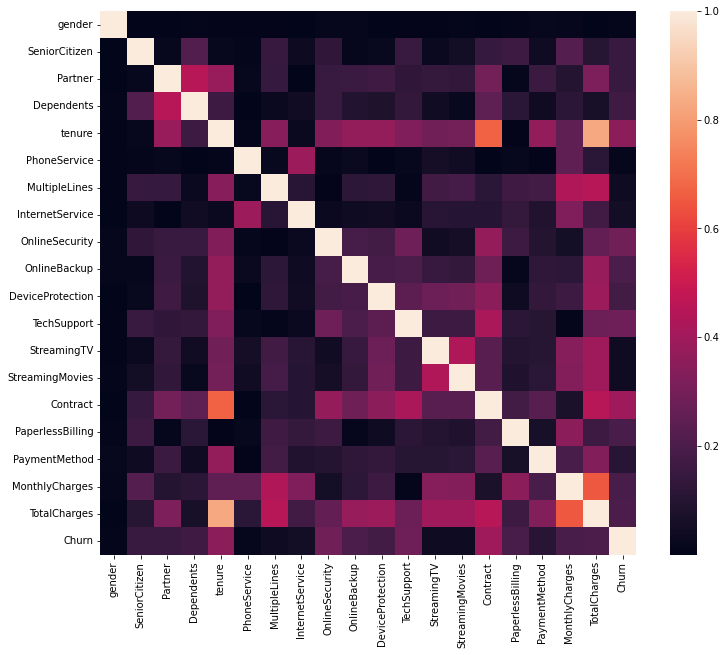

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(abs(data.corr()), ax=ax)

In [33]:
corr_num_list = []

for i in range(len(data.corr().columns)):
    corr_num_list.append((data.corr().columns[i],(abs(data.corr()) > 0.2).sum()[i]))
    
corr_num_list

[('gender', 1),
 ('SeniorCitizen', 3),
 ('Partner', 5),
 ('Dependents', 4),
 ('tenure', 14),
 ('PhoneService', 3),
 ('MultipleLines', 4),
 ('InternetService', 3),
 ('OnlineSecurity', 6),
 ('OnlineBackup', 4),
 ('DeviceProtection', 7),
 ('TechSupport', 7),
 ('StreamingTV', 7),
 ('StreamingMovies', 7),
 ('Contract', 13),
 ('PaperlessBilling', 2),
 ('PaymentMethod', 4),
 ('MonthlyCharges', 10),
 ('TotalCharges', 13),
 ('Churn', 5)]

In [36]:
corr_B = data.corr().loc[data.corr()['Churn'][abs(data.corr()['Churn']) > 0.2].index, data.corr()['Churn'][abs(data.corr()['Churn']) > 0.2].index]

In [37]:
abs(corr_B)

tenure  OnlineSecurity  TechSupport  Contract     Churn
tenure          1.000000        0.325468     0.322942  0.671607  0.352229
OnlineSecurity  0.325468        1.000000     0.285028  0.374416  0.289309
TechSupport     0.322942        0.285028     1.000000  0.425367  0.282492
Contract        0.671607        0.374416     0.425367  1.000000  0.396713
Churn           0.352229        0.289309     0.282492  0.396713  1.000000

<AxesSubplot:>

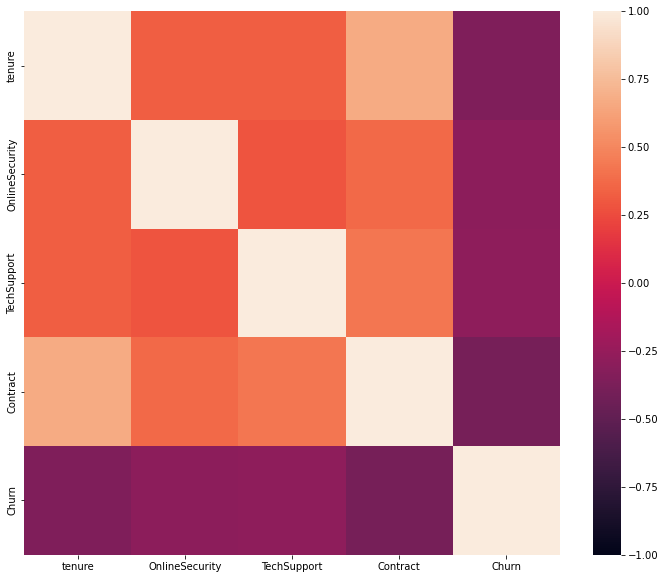

In [38]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_B, ax=ax, vmin= -1, vmax= 1)

(array([1371.,  698.,  568.,  479.,  453.,  423.,  364.,  384.,  416.,
         404.,  450., 1033.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60., 66., 72.]),
 <BarContainer object of 12 artists>)

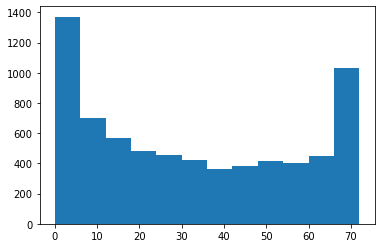

In [7]:
plt.hist(data['tenure'], bins=12)

No:  3498
Yes:  2019
No internet Services:  1526


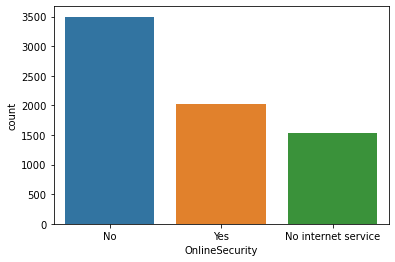

In [61]:
sns.countplot(data['OnlineSecurity'])
print('No: ', len(data[data['OnlineSecurity'] == 'No']))
print('Yes: ', len(data[data['OnlineSecurity'] == 'Yes']))
print('No internet Services: ', len(data[data['OnlineSecurity'] == 'No internet service']))

No:  3473
Yes:  2044
No Internet Service:  1526


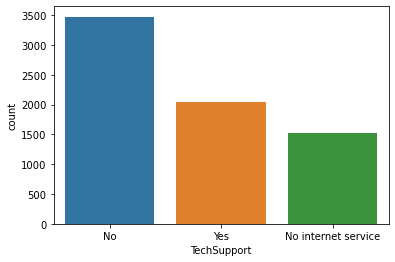

In [63]:
sns.countplot(data['TechSupport'])
print('No: ', len(data[data['TechSupport'] == 'No']))
print('Yes: ', len(data[data['TechSupport'] == 'Yes']))
print('No Internet Service: ', len(data[data['TechSupport'] == 'No internet service']))

Month-to-month:  3875
One Year:  1473
Two Year:  1695


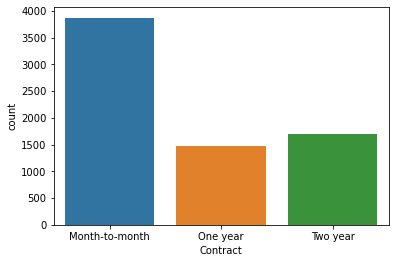

In [73]:
sns.countplot(data['Contract'])
print('Month-to-month: ', len(data[data['Contract'] == 'Month-to-month']))
print('One Year: ', len(data[data['Contract'] == 'One year']))
print('Two Year: ', len(data[data['Contract'] == 'Two year']))
#print('Two year: ', len(data[data['Two year'] == 'Two year']))